# Construct Moisture Space Grids

In [30]:
%load_ext autoreload
%autoreload 2
import os
import xarray as xr
import numpy as np
import numpy as np
from src.configs import ProjectConfigs, gSAMConfigs
from src.processing import MoistureSpaceGrids

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
## Parameters
VARIABLE = '2D'
REGION   = 'northwest_tropical_pacific'
GRIDSIZE = 50

We get the files and loop over them

In [88]:
grids = MoistureSpaceGrids(REGION, GRIDSIZE)

In [89]:
variable_files = grids._get_variable_files(VARIABLE)
surface_files = grids._get_matching_surface_files(variable_files)
out_dir = f'{gSAMConfigs().moisture_space_var_dir(grids.region, VARIABLE, grids.gridsize)}'
os.makedirs(out_dir, exist_ok=True)
for vi, (var_file, surf_file) in enumerate(zip(variable_files, surface_files)):
    if vi<10:
        continue
    satfrac = grids._compute_saturation_fraction(surf_file)
    var_ds = xr.open_dataset(var_file)
    grid_slices = grids._generate_grid_lonlat_slices(satfrac.lon.size, satfrac.lat.size)
    for loni, lon_slice in enumerate(grid_slices['lon_slices']):
        for lati, lat_slice in enumerate(grid_slices['lat_slices']):
            print(f'Processing File {vi+1} of {len(variable_files)} :: lon {loni+1}/{len(grid_slices["lon_slices"])} :: lat {lati+1}/{len(grid_slices["lat_slices"])}')
            filename_out = f'/{grids._filename_to_save(loni, lati, var_file)}'
            if os.path.exists(out_dir + filename_out):
                print('File exists! Skipping ...')
                
            grid_slice = {'lon': lon_slice, 'lat': lat_slice}
            grid_var = var_ds.isel(grid_slice)
            grid_satfrac = satfrac.isel(grid_slice)
            sorted_var = grids._sort_grid_by_satfrac(grid_var, grid_satfrac)
            break
        break
    break
    
            # sorted_var.to_netcdf(out_dir + filename_out)

Processing File 11 of 233 :: lon 1/20 :: lat 1/10


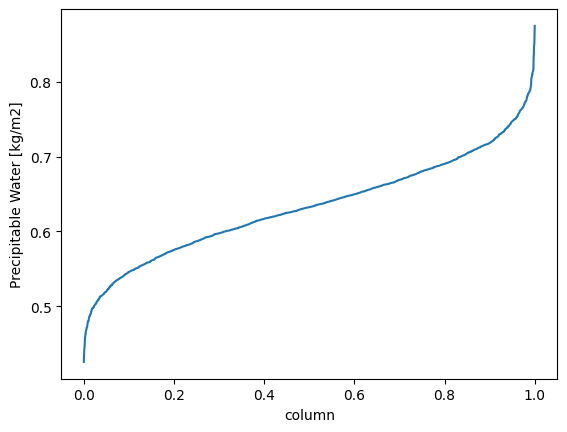

In [92]:
(sorted_var.PW/sorted_var.PWS).plot()

In [62]:
surf_file

'/glade/work/pangulo/gsam_dyamond_winter/northwest_tropical_pacific/2D/northwest_tropical_pacific.DYAMOND2_9216x4608x74_10s_4608_20200201000000_0000103680.2D_atm.nc'

In [99]:
path = '/glade/u/home/pangulo/work/gsam_dyamond_winter/northwest_tropical_pacific/W_moisture_space_grids_50pix/'
fn = 'satfrac_sorted.lon_2.lat_2.northwest_tropical_pacific.DYAMOND2_9216x4608x74_10s_4608_20200201000000_0000103680_W.atm.3D.nc'

In [100]:
ds = xr.open_dataset(path+fn)